In [97]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
plt.style.use('seaborn')
%matplotlib inline

In [10]:
p1 = pd.read_csv('data/Responses/responsesP1(Jan-Feb).csv')
p2 = pd.read_csv('data/Responses/responsesP2(Mar-Apr).csv')
p3 = pd.read_csv('data/Responses/responsesP3(May-Jun).csv')
p4 = pd.read_csv('data/Responses/responsesP4(Jul-Aug).csv')
p4 = pd.read_csv('data/Responses/responsesP4(Jul-Aug).csv')
p5 = pd.read_csv('data/Responses/responsesP5(Sep-Oct).csv')
p6 = pd.read_csv('data/Responses/responsesP6(Nov-Dec).csv')

In [138]:
#use this for performance
q2 = pd.read_csv('data/Incidents/incidentsQ2.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)

In [148]:
q1 = pd.read_csv('data/Incidents/incidentsQ1.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)

In [169]:
p1_performance = (q1.groupby(q1.index.date)['response_aqi'].sum() / 3600)[-31:]

In [170]:
p2_performance = (q2.groupby(q2.index.date)['response_aqi'].sum() / 3600)[:30]

In [171]:
response_aqi = pd.concat([p1_performance, p2_performance], axis=0)

In [172]:
p2_performance = (p2.groupby('date')['jobcycle'].sum() - p2.groupby('date')['hospitalturnaround'].sum()) / 3600

In [173]:
a = pd.concat([response_aqi, p2_performance], axis=1)

In [175]:
a.corr()

,response_aqi,0
response_aqi,1.000000,0.405123
0,0.405123,1.000000


In [9]:
p1.columns

Index(['incidentid', 'fpid', 'activationid', 'callsignkey', 'callstart',
       'dispatch', 'arrivedatscene', 'leftscene', 'arrivedathospital',
       'greentime', 'bluecall', 'age', 'sex', 'lat_activation',
       'lon_activation', 'lat_incident', 'lon_incident', 'borough', 'ccgname',
       'ccgcluster', 'lsoa', 'wardname', 'wardID', 'response', 'activation',
       'mobilisation', 'running', 'tohospital', 'onscene',
       'hospitalturnaround', 'jobcycle', 'dispatchtypegroup',
       'distance_to_scene', 'callconcluded', 'T0_T5CallConnectToCallConcluded',
       'mps', 'ht', 'dohcategory', 'chiefcomplaintcode', 'chiefcomplaint',
       'hospitalcode', 'conveyed', 'conveyed_ed'],
      dtype='object')

In [11]:
responses = pd.concat([p1, p2, p3, p4, p5, p6])

In [4]:
capacity = pd.read_excel('data/Capacity/las_daily_ambulance_capacity_data.xlsx')

In [5]:
capacity.head()

,Week Ending,Month,Fyear,Date,Wday,DCA aPFVH
0,2018-02-25,2018-02-01,20172018,2018-02-23,Fri,4876.866667
1,2018-02-25,2018-02-01,20172018,2018-02-24,Sat,4584.983333
2,2018-02-25,2018-02-01,20172018,2018-02-25,Sun,4465.400000
3,2018-03-04,2018-02-01,20172018,2018-02-26,Mon,4930.800000
4,2018-03-04,2018-02-01,20172018,2018-02-27,Tue,5028.316667


In [38]:
p2.columns

Index(['incidentid', 'fpid', 'activationid', 'callsignkey', 'callstart',
       'dispatch', 'arrivedatscene', 'leftscene', 'arrivedathospital',
       'greentime', 'bluecall', 'age', 'sex', 'lat_activation',
       'lon_activation', 'lat_incident', 'lon_incident', 'borough', 'ccgname',
       'ccgcluster', 'lsoa', 'wardname', 'wardID', 'response', 'activation',
       'mobilisation', 'running', 'tohospital', 'onscene',
       'hospitalturnaround', 'jobcycle', 'dispatchtypegroup',
       'distance_to_scene', 'callconcluded', 'T0_T5CallConnectToCallConcluded',
       'mps', 'ht', 'dohcategory', 'chiefcomplaintcode', 'chiefcomplaint',
       'hospitalcode', 'conveyed', 'conveyed_ed'],
      dtype='object')

In [189]:
responses.tail()

,incidentid,fpid,activationid,callsignkey,callstart,dispatch,arrivedatscene,leftscene,arrivedathospital,greentime,...,callconcluded,T0_T5CallConnectToCallConcluded,mps,ht,dohcategory,chiefcomplaintcode,chiefcomplaint,hospitalcode,conveyed,conveyed_ed
356478,20190101005998,342323,115931785,22391,2019-01-01 20:13:27.000,2019-01-01 20:33:29.000,NaN,NaN,NaN,2019-01-01 20:58:06.000,...,NaN,NaN,0,0,C3,111.0,NHS 111 Transfer,9023,0,0
356479,20190101005998,342323,115931928,22394,2019-01-01 20:13:27.000,2019-01-01 21:05:13.000,2019-01-01 21:11:30.000,NaN,NaN,2019-01-01 22:17:11.000,...,NaN,NaN,0,0,C3,111.0,NHS 111 Transfer,9023,0,0
356480,20190101005999,342324,115931786,22413,2019-01-01 20:13:43.000,2019-01-01 20:35:08.000,2019-01-01 20:43:28.000,NaN,NaN,2019-01-02 00:12:22.000,...,NaN,NaN,0,0,C2,111.0,NHS 111 Transfer,9008,0,0
356481,20190101006000,342325,115931621,19806,2019-01-01 20:13:46.000,2019-01-01 20:14:42.000,2019-01-01 20:29:21.000,NaN,NaN,2019-01-01 21:30:05.000,...,NaN,NaN,0,0,C2,111.0,NHS 111 Transfer,9001,0,0
356482,20190101006002,342327,115931729,22492,2019-01-01 20:14:47.000,2019-01-01 20:19:06.000,2019-01-01 20:26:52.000,2019-01-01 20:46:18.000,2019-01-01 21:02:54.000,2019-01-01 21:27:12.000,...,2019-01-01 20:22:46.000,479.0,0,0,C2,26.0,Sick Person (Specific Diagnosis),421,1,0


In [190]:
#get rid of time, just date responses
p2 = responses
p2['date'] = pd.to_datetime(p2.callstart).dt.date
#responses['date'] = pd.to_datetime(responses.callstart).dt.date

In [191]:
#jobcycle sans hospitalturnaround / 3600
p2_performance = (p2.groupby('date')['jobcycle'].sum() - p2.groupby('date')['hospitalturnaround'].sum()) / 3600

In [192]:
#calculate overall speed of the day
p2_to_incident = p2.groupby('date')['activation', 'mobilisation', 'running', 'tohospital'].sum()
p2_to_incident['drive_time'] = p2_to_incident.iloc[:, 0:4].sum(axis=1)
p2_distance = p2.groupby('date')['distance_to_scene'].sum()
p2_speed = p2_distance / p2_to_incident['drive_time']

In [193]:
#calculate hospital availability
p2_hospital = p2.groupby('date')['hospitalturnaround'].sum() / 3600

In [194]:
#concat and merge to get all the factors
p2_scm = pd.concat([p2_speed, p2_hospital, p2_performance], axis=1).rename(columns={0:'speed', 1:'performance'})
p2_scm.index = pd.to_datetime(p2_scm.index)
p2_scm = pd.merge(p2_scm, capacity.loc[:, ['Date', 'DCA aPFVH']], left_index=True, right_on='Date')

In [195]:
#rename 'DCA aPFVH' to 'capacity'
p2_scm = p2_scm.rename(columns={'DCA aPFVH':'capacity'})
#set Date to index
p2_scm.set_index('Date', inplace=True)

In [201]:
p2_scm.head()

,speed,hospitalturnaround,performance,capacity
Date,,,,
2018-02-23,1.409431,1462.972500,4251.687778,4876.866667
2018-02-24,1.330703,1409.465556,4231.288333,4584.983333
2018-02-25,1.382970,1385.304722,4035.702778,4465.400000
2018-02-26,1.638320,1652.871111,4153.355556,4930.800000
2018-02-27,1.655712,1559.027778,4191.337500,5028.316667


In [197]:
#standardize the dataset
scaler = preprocessing.StandardScaler()
p2_scm_normalized = scaler.fit_transform(p2_scm)
p2_scm_normalized = pd.DataFrame(p2_scm_normalized, columns=p2_scm.columns)

In [198]:
p2_scm_normalized.head()

,speed,hospitalturnaround,performance,capacity
0,-1.201479,0.308800,0.368030,-0.085841
1,-1.548382,-0.044476,0.314536,-1.199958
2,-1.318074,-0.203997,-0.198352,-1.656407
3,-0.192912,1.562595,0.110171,0.120023
4,-0.116278,0.943000,0.209772,0.492244


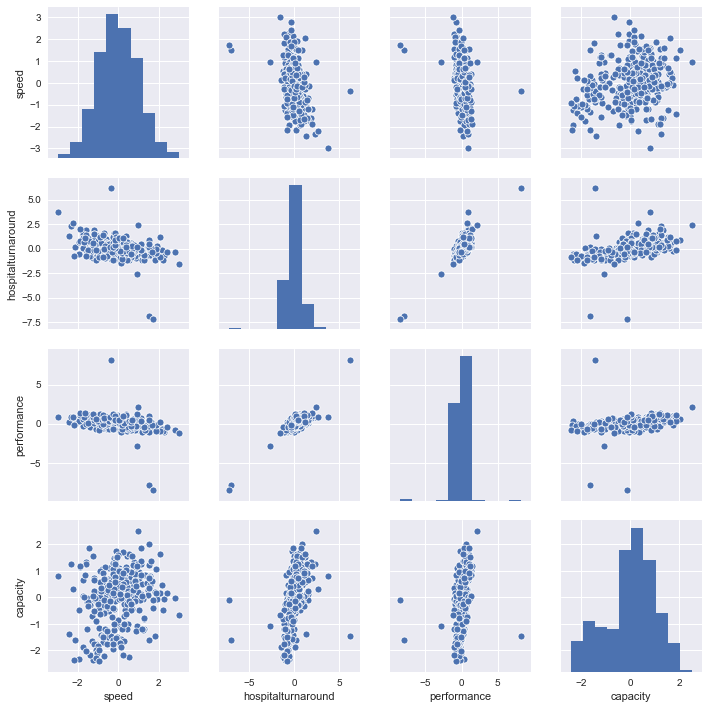

In [199]:
sns.pairplot(p2_scm_normalized)

In [200]:
model = sm.formula.ols('performance ~ speed + hospitalturnaround + capacity', data=p2_scm_normalized)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           8.66e-85
Time:                        13:44:48   Log-Likelihood:                -245.55
No. Observations:                 313   AIC:                             499.1
Df Residuals:                     309   BIC:                             514.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.819e-16      0.030   3.26e-14      1.000      -0.059       0.059
speed                 -0.0364      0.036     -1.001      0.317      -0.108       0.035
hospitalturnaround     0.8614      0.040     21.663      0.000       0.783       0.940
capacity              -0.0634      0.039     -1.643      0.101      -0.139       0.013
==============================================================================
Omnibus:                       46.105   Durbin-Watson:                   0.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.294
Skew:                          -0.398   Prob(JB):                     4.96e-57
Kurtosis:                       7.387   Cond. No.                         2.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
model = sm.formula.ols('response_aqi ~ speed', data=p2_scm_normalized)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           response_aqi   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     548.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           1.45e-31
Time:                        00:35:57   Log-Likelihood:                -15.437
No. Observations:                  61   AIC:                             34.87
Df Residuals:                      59   BIC:                             39.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.106e-16      0.041    1.5e-14      1.000      -0.081       0.081
speed         -0.9502      0.041    -23.419      0.000      -1.031      -0.869
==============================================================================
Omnibus:                       19.682   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.299
Skew:                           1.198   Prob(JB):                     7.16e-07
Kurtosis:                       5.322   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
model = sm.formula.ols('performance ~ speed + hospitalturnaround + capacity', data=p2_scm_normalized)
result = model.fit()
result.summary()

Intercept             6.418477e-17
speed                 1.107207e-01
hospitalturnaround    1.061790e+00
capacity             -1.710488e-01
dtype: float64

In [187]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     137.0
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           5.00e-26
Time:                        13:39:57   Log-Likelihood:                -22.341
No. Observations:                  61   AIC:                             52.68
Df Residuals:                      57   BIC:                             61.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.418e-17      0.046   1.39e-15      1.000      -0.093       0.093
speed                  0.1107      0.059      1.872      0.066      -0.008       0.229
hospitalturnaround     1.0618      0.066     16.066      0.000       0.929       1.194
capacity              -0.1710      0.056     -3.065      0.003      -0.283      -0.059
==============================================================================
Omnibus:                        4.401   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.651
Skew:                          -0.587   Prob(JB):                        0.161
Kurtosis:                       3.240   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model = sm.formula.ols('performance ~ speed + hospitalturnaround + capacity', data=p2_scm_normalized)
result = model.fit()
result.params

Intercept             2162.269385
speed                  234.437202
hospitalturnaround       2.562447
capacity                -0.463448
dtype: float64

In [99]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     137.0
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           5.00e-26
Time:                        22:25:32   Log-Likelihood:                -412.06
No. Observations:                  61   AIC:                             832.1
Df Residuals:                      57   BIC:                             840.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2162.2694    630.880      3.427      0.001     898.955    3425.584
speed                234.4372    125.201      1.872      0.066     -16.273     485.147
hospitalturnaround     2.5624      0.159     16.066      0.000       2.243       2.882
capacity              -0.4634      0.151     -3.065      0.003      -0.766      -0.161
==============================================================================
Omnibus:                        4.401   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.651
Skew:                          -0.587   Prob(JB):                        0.161
Kurtosis:                       3.240   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""